# 機械学習スクラッチ ロジスティック回帰

参考サイト：<br>
https://enjoyworks.jp/tech-blog/3087<br>
https://jp.mathworks.com/help/stats/regularize-logistic-regression.html<br>

In [ ]:
import numpy as np

class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    def __init__(self, num_iter=1000, lr=1e-10, bias=False, verbose=False, lmd=0.01):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.lmd = lmd
        self.loss_list = []
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        self.theta = np.random.rand(X.shape[1], 1)
        if self.bias:
            theta_bias = np.ones((1,1))
            self.theta = np.insert(self.theta, 0, theta_bias)
#             print(self.theta)
            X = np.insert(X, 0, 1, axis=1)
        
        for i in range(self.iter):
            x = self._linear_hypothis(X)
            y_hat = self.sigmoid(x)
            self.loss = self.target_function(X, y, y_hat)
            self._gradient_descent(X, y, y_hat)
            self.loss_list.append(self.loss)
            
        
            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                print('{0} / {1} times done | loss value: {2}'.format(i+1, self.iter, self.loss))
                

    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        pass
        return
    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        pass
        return
    
    # 問題1
    def sigmoid(self, x):
        return 1 / (1 + np.exp(x))

    def _linear_hypothis(self, X):
        return np.dot(X, self.theta)
    
    # 問題2
    def _gradient_descent(self, X, y, y_hat):
        tmp = y_hat - y
        tmp = tmp.reshape(-1, 1)
        error_times_x = np.dot(tmp.T, X)
        met_sum = np.sum(error_times_x, axis=0)
    #   print(met_sum.shape, self.theta.shape)
        self.theta[0] = met_sum[0] / X.shape[0]
        for j in range(1, X.shape[1]):
            self.theta[j] = self.theta[j] - ((self.lr / X.shape[0]) * met_sum[j])\
            + (self.lmd * self.theta[j] / X.shape[0])
    
    # 問題4
    def target_function(self, X, y, y_hat):
        return (np.sum(- y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)) / m)\
                + (self.lmd * np.sum(self.theta**2) / 2 * X.shape[0])

【問題1】仮定関数

In [ ]:
# シグモイド関数、仮定関数の定義
def sigmoid(self, x):
    return 1 / (1 + np.exp(x))

def _linear_hypothis(self, X):
    return np.dot(X, self.theta)

【問題2】最急降下法

In [ ]:
def _gradient_descent(self, X, y):
    x = self._linearhypothis(X)
    pred = self.sigmoid(x)
    tmp = error - y
    tmp = tmp.reshape(-1, 1)
    error_times_x = np.dot(tmp.T, X)
    met_sum = np.sum(error_times_x, axis=0)
#   print(met_sum.shape, self.theta.shape)
    self.theta[0] = met_sum[0] / X.shape[0]
    for j in range(1, X.shape[1]):
        self.theta[j] = self.theta[j] - ((self.lr / X.shape[0]) * met_sum[j])\
        + (self.lmd * self.theta[j] / X.shape[0])

【問題3】推定

上で実装済み

【問題4】目的関数

In [ ]:
def target_function(self, X, y, y_hat):
    return (np.sum(- y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)) / m)\
            + (self.lmd * np.sum(self.theta**2) / 2 * X.shape[0])

【問題5】学習と推定

In [453]:
import numpy as np

class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    def __init__(self, num_iter=10000, lr=0.0001, bias=False, verbose=False, lmd=0.01):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.lmd = lmd
        self.loss_list = []
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        self.theta = np.random.rand(X.shape[1], 1)
        if self.bias:
            theta_bias = np.ones((1,1))
            self.theta = np.insert(self.theta, 0, theta_bias)
            X = np.insert(X, 0, 1, axis=1)
        
        for i in range(self.iter):
            x = self._linear_hypothis(X)
            y_hat = self.sigmoid(x)
            self.loss = self.target_function(X, y, y_hat)
            self._gradient_descent(X, y, y_hat)
            self.loss_list.append(self.loss)

            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                print('{0} / {1} times done | loss value: {2}'.format(i+1, self.iter, self.loss))
                

    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        # 問題3
        if self.bias:
            X = np.insert(X, 0, 1, axis=1)
        x = self._linear_hypothis(X=X)
        y_hat = self.sigmoid(x)
        for i in range(len(y_hat)):
            if y_hat[i] > 0.5:
                y_hat[i] = 1
            else:
                y_hat[i] = 0
        return y_hat
    
    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        if self.bias:
            X = np.insert(X, 0, 1, axis=1)
        x = self._linear_hypothis(X=X)
        y_hat = self.sigmoid(x)
        
        return y_hat
    
    # 問題1
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-1 * x))

    def _linear_hypothis(self, X):
        return np.dot(X, self.theta)
    
    # 問題2
    def _gradient_descent(self, X, y, y_hat):
        tmp = y_hat - y
        tmp = tmp.reshape(-1, 1) # tmp.shape:(80, 1), X.shape:(80, 5)
        error_times_x = tmp * X 
        met_sum = np.sum(error_times_x, axis=0)
        # バイアス項の処理
        self.theta[0] = self.theta[0] - self.lr * (met_sum[0] / X.shape[0])
        # バイアス項以外の特徴量の処理
        for j in range(1, X.shape[1]):
            self.theta[j] = self.theta[j] - self.lr * (((1 / X.shape[0]) * met_sum[j])\
            + (self.lmd * self.theta[j] / X.shape[0]))
    
    # 問題4
    def target_function(self, X, y, y_hat):
        return (np.sum(- y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)) / X.shape[0])\
                + (self.lmd * np.sum(self.theta**2) / 2 * X.shape[0])

In [474]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics

iris = load_iris()
iris_data = iris.data[:100, :2]
iris_target = iris.target[:100]

In [475]:
iris_data.shape

(100, 2)

In [476]:
iris_target.shape

(100,)

In [477]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_target, test_size=0.2)

In [478]:
SLR = ScratchLogisticRegression(bias=True, verbose=True)
SLR.fit(X_train, y_train)
pred = SLR.predict(X_test)
pred_proba = SLR.predict_proba(X_test)
print('予測ラベル: \n', pred)
print('予測確率: \n', pred_proba)

1 / 10000 times done | loss value: 2.0533521638232664
2 / 10000 times done | loss value: 2.0524578138904794
3 / 10000 times done | loss value: 2.051563870367144
4 / 10000 times done | loss value: 2.050670333623022
5 / 10000 times done | loss value: 2.0497772040278552
6 / 10000 times done | loss value: 2.048884481951367
7 / 10000 times done | loss value: 2.0479921677632573
8 / 10000 times done | loss value: 2.047100261833203
9 / 10000 times done | loss value: 2.0462087645308573
10 / 10000 times done | loss value: 2.0453176762258445
11 / 10000 times done | loss value: 2.0444269972877613
12 / 10000 times done | loss value: 2.0435367280861754
13 / 10000 times done | loss value: 2.042646868990623
14 / 10000 times done | loss value: 2.0417574203706055
15 / 10000 times done | loss value: 2.0408683825955922
16 / 10000 times done | loss value: 2.039979756035016
17 / 10000 times done | loss value: 2.03909154105827
18 / 10000 times done | loss value: 2.038203738034711
19 / 10000 times done | loss

1013 / 10000 times done | loss value: 1.4031264709494873
1014 / 10000 times done | loss value: 1.402752333824248
1015 / 10000 times done | loss value: 1.4023786825296192
1016 / 10000 times done | loss value: 1.4020055167194783
1017 / 10000 times done | loss value: 1.4016328360471115
1018 / 10000 times done | loss value: 1.40126064016522
1019 / 10000 times done | loss value: 1.4008889287259179
1020 / 10000 times done | loss value: 1.4005177013807382
1021 / 10000 times done | loss value: 1.4001469577806314
1022 / 10000 times done | loss value: 1.3997766975759707
1023 / 10000 times done | loss value: 1.3994069204165516
1024 / 10000 times done | loss value: 1.3990376259515966
1025 / 10000 times done | loss value: 1.3986688138297545
1026 / 10000 times done | loss value: 1.3983004836991055
1027 / 10000 times done | loss value: 1.3979326352071604
1028 / 10000 times done | loss value: 1.3975652680008657
1029 / 10000 times done | loss value: 1.3971983817266027
1030 / 10000 times done | loss val

1803 / 10000 times done | loss value: 1.2262888945945096
1804 / 10000 times done | loss value: 1.2261741218027191
1805 / 10000 times done | loss value: 1.2260595296377381
1806 / 10000 times done | loss value: 1.2259451178024974
1807 / 10000 times done | loss value: 1.2258308860003009
1808 / 10000 times done | loss value: 1.2257168339348232
1809 / 10000 times done | loss value: 1.2256029613101116
1810 / 10000 times done | loss value: 1.2254892678305858
1811 / 10000 times done | loss value: 1.2253757532010365
1812 / 10000 times done | loss value: 1.2252624171266273
1813 / 10000 times done | loss value: 1.225149259312893
1814 / 10000 times done | loss value: 1.2250362794657401
1815 / 10000 times done | loss value: 1.2249234772914477
1816 / 10000 times done | loss value: 1.2248108524966659
1817 / 10000 times done | loss value: 1.2246984047884162
1818 / 10000 times done | loss value: 1.2245861338740938
1819 / 10000 times done | loss value: 1.2244740394614628
1820 / 10000 times done | loss v

2374 / 10000 times done | loss value: 1.18253096569281
2375 / 10000 times done | loss value: 1.182481700134055
2376 / 10000 times done | loss value: 1.1824324999724793
2377 / 10000 times done | loss value: 1.1823833650859186
2378 / 10000 times done | loss value: 1.182334295352425
2379 / 10000 times done | loss value: 1.1822852906502654
2380 / 10000 times done | loss value: 1.1822363508579226
2381 / 10000 times done | loss value: 1.1821874758540938
2382 / 10000 times done | loss value: 1.1821386655176904
2383 / 10000 times done | loss value: 1.1820899197278387
2384 / 10000 times done | loss value: 1.1820412383638783
2385 / 10000 times done | loss value: 1.1819926213053629
2386 / 10000 times done | loss value: 1.1819440684320588
2387 / 10000 times done | loss value: 1.1818955796239452
2388 / 10000 times done | loss value: 1.1818471547612148
2389 / 10000 times done | loss value: 1.1817987937242718
2390 / 10000 times done | loss value: 1.1817504963937324
2391 / 10000 times done | loss valu

3012 / 10000 times done | loss value: 1.1603492129685422
3013 / 10000 times done | loss value: 1.1603241982131542
3014 / 10000 times done | loss value: 1.1602992029410788
3015 / 10000 times done | loss value: 1.160274227115405
3016 / 10000 times done | loss value: 1.160249270699293
3017 / 10000 times done | loss value: 1.1602243336559757
3018 / 10000 times done | loss value: 1.1601994159487559
3019 / 10000 times done | loss value: 1.160174517541009
3020 / 10000 times done | loss value: 1.1601496383961816
3021 / 10000 times done | loss value: 1.160124778477791
3022 / 10000 times done | loss value: 1.160099937749426
3023 / 10000 times done | loss value: 1.1600751161747458
3024 / 10000 times done | loss value: 1.1600503137174805
3025 / 10000 times done | loss value: 1.1600255303414309
3026 / 10000 times done | loss value: 1.1600007660104683
3027 / 10000 times done | loss value: 1.1599760206885341
3028 / 10000 times done | loss value: 1.1599512943396402
3029 / 10000 times done | loss value

3954 / 10000 times done | loss value: 1.141996098753677
3955 / 10000 times done | loss value: 1.1419798027134458
3956 / 10000 times done | loss value: 1.1419635103417192
3957 / 10000 times done | loss value: 1.1419472216327997
3958 / 10000 times done | loss value: 1.1419309365810006
3959 / 10000 times done | loss value: 1.1419146551806472
3960 / 10000 times done | loss value: 1.1418983774260758
3961 / 10000 times done | loss value: 1.1418821033116333
3962 / 10000 times done | loss value: 1.1418658328316793
3963 / 10000 times done | loss value: 1.1418495659805834
3964 / 10000 times done | loss value: 1.1418333027527272
3965 / 10000 times done | loss value: 1.1418170431425034
3966 / 10000 times done | loss value: 1.1418007871443159
3967 / 10000 times done | loss value: 1.141784534752579
3968 / 10000 times done | loss value: 1.1417682859617195
3969 / 10000 times done | loss value: 1.1417520407661745
3970 / 10000 times done | loss value: 1.1417357991603923
3971 / 10000 times done | loss va

4574 / 10000 times done | loss value: 1.1324265522904478
4575 / 10000 times done | loss value: 1.1324117767680733
4576 / 10000 times done | loss value: 1.1323970028868353
4577 / 10000 times done | loss value: 1.1323822306450806
4578 / 10000 times done | loss value: 1.1323674600411588
4579 / 10000 times done | loss value: 1.132352691073424
4580 / 10000 times done | loss value: 1.1323379237402322
4581 / 10000 times done | loss value: 1.1323231580399438
4582 / 10000 times done | loss value: 1.1323083939709218
4583 / 10000 times done | loss value: 1.1322936315315326
4584 / 10000 times done | loss value: 1.1322788707201452
4585 / 10000 times done | loss value: 1.1322641115351335
4586 / 10000 times done | loss value: 1.1322493539748733
4587 / 10000 times done | loss value: 1.1322345980377437
4588 / 10000 times done | loss value: 1.132219843722127
4589 / 10000 times done | loss value: 1.1322050910264094
4590 / 10000 times done | loss value: 1.1321903399489799
4591 / 10000 times done | loss va

5292 / 10000 times done | loss value: 1.1221663276381557
5293 / 10000 times done | loss value: 1.122152450725538
5294 / 10000 times done | loss value: 1.1221385748184376
5295 / 10000 times done | loss value: 1.122124699916448
5296 / 10000 times done | loss value: 1.1221108260191648
5297 / 10000 times done | loss value: 1.122096953126183
5298 / 10000 times done | loss value: 1.1220830812370994
5299 / 10000 times done | loss value: 1.1220692103515109
5300 / 10000 times done | loss value: 1.1220553404690157
5301 / 10000 times done | loss value: 1.1220414715892117
5302 / 10000 times done | loss value: 1.122027603711699
5303 / 10000 times done | loss value: 1.1220137368360779
5304 / 10000 times done | loss value: 1.121999870961949
5305 / 10000 times done | loss value: 1.1219860060889135
5306 / 10000 times done | loss value: 1.1219721422165752
5307 / 10000 times done | loss value: 1.1219582793445362
5308 / 10000 times done | loss value: 1.121944417472401
5309 / 10000 times done | loss value:

6010 / 10000 times done | loss value: 1.1124431313471699
6011 / 10000 times done | loss value: 1.1124299063143515
6012 / 10000 times done | loss value: 1.112416682125742
6013 / 10000 times done | loss value: 1.11240345878123
6014 / 10000 times done | loss value: 1.1123902362807039
6015 / 10000 times done | loss value: 1.1123770146240533
6016 / 10000 times done | loss value: 1.1123637938111672
6017 / 10000 times done | loss value: 1.112350573841935
6018 / 10000 times done | loss value: 1.1123373547162467
6019 / 10000 times done | loss value: 1.1123241364339918
6020 / 10000 times done | loss value: 1.1123109189950602
6021 / 10000 times done | loss value: 1.1122977023993421
6022 / 10000 times done | loss value: 1.112284486646728
6023 / 10000 times done | loss value: 1.1122712717371086
6024 / 10000 times done | loss value: 1.112258057670374
6025 / 10000 times done | loss value: 1.1122448444464155
6026 / 10000 times done | loss value: 1.1122316320651242
6027 / 10000 times done | loss value:

6932 / 10000 times done | loss value: 1.1005975656149625
6933 / 10000 times done | loss value: 1.1005850877205985
6934 / 10000 times done | loss value: 1.1005726106140117
6935 / 10000 times done | loss value: 1.100560134295168
6936 / 10000 times done | loss value: 1.1005476587640342
6937 / 10000 times done | loss value: 1.1005351840205773
6938 / 10000 times done | loss value: 1.1005227100647637
6939 / 10000 times done | loss value: 1.1005102368965598
6940 / 10000 times done | loss value: 1.1004977645159326
6941 / 10000 times done | loss value: 1.1004852929228486
6942 / 10000 times done | loss value: 1.100472822117275
6943 / 10000 times done | loss value: 1.1004603520991787
6944 / 10000 times done | loss value: 1.1004478828685258
6945 / 10000 times done | loss value: 1.100435414425284
6946 / 10000 times done | loss value: 1.1004229467694193
6947 / 10000 times done | loss value: 1.1004104799008994
6948 / 10000 times done | loss value: 1.1003980138196912
6949 / 10000 times done | loss val

7666 / 10000 times done | loss value: 1.0916487953162208
7667 / 10000 times done | loss value: 1.0916368880885414
7668 / 10000 times done | loss value: 1.091624981629413
7669 / 10000 times done | loss value: 1.091613075938814
7670 / 10000 times done | loss value: 1.0916011710167226
7671 / 10000 times done | loss value: 1.0915892668631173
7672 / 10000 times done | loss value: 1.0915773634779766
7673 / 10000 times done | loss value: 1.091565460861279
7674 / 10000 times done | loss value: 1.0915535590130028
7675 / 10000 times done | loss value: 1.0915416579331265
7676 / 10000 times done | loss value: 1.0915297576216285
7677 / 10000 times done | loss value: 1.0915178580784877
7678 / 10000 times done | loss value: 1.091505959303682
7679 / 10000 times done | loss value: 1.09149406129719
7680 / 10000 times done | loss value: 1.0914821640589905
7681 / 10000 times done | loss value: 1.0914702675890617
7682 / 10000 times done | loss value: 1.0914583718873825
7683 / 10000 times done | loss value:

8508 / 10000 times done | loss value: 1.081893003048294
8509 / 10000 times done | loss value: 1.0818817358332786
8510 / 10000 times done | loss value: 1.081870469370366
8511 / 10000 times done | loss value: 1.081859203659538
8512 / 10000 times done | loss value: 1.0818479387007764
8513 / 10000 times done | loss value: 1.0818366744940633
8514 / 10000 times done | loss value: 1.08182541103938
8515 / 10000 times done | loss value: 1.0818141483367083
8516 / 10000 times done | loss value: 1.0818028863860303
8517 / 10000 times done | loss value: 1.0817916251873274
8518 / 10000 times done | loss value: 1.0817803647405815
8519 / 10000 times done | loss value: 1.0817691050457747
8520 / 10000 times done | loss value: 1.0817578461028883
8521 / 10000 times done | loss value: 1.0817465879119044
8522 / 10000 times done | loss value: 1.0817353304728043
8523 / 10000 times done | loss value: 1.0817240737855707
8524 / 10000 times done | loss value: 1.0817128178501845
8525 / 10000 times done | loss value

9391 / 10000 times done | loss value: 1.0722348748611816
9392 / 10000 times done | loss value: 1.0722242648118376
9393 / 10000 times done | loss value: 1.0722136554989974
9394 / 10000 times done | loss value: 1.0722030469226438
9395 / 10000 times done | loss value: 1.0721924390827593
9396 / 10000 times done | loss value: 1.0721818319793264
9397 / 10000 times done | loss value: 1.0721712256123286
9398 / 10000 times done | loss value: 1.072160619981748
9399 / 10000 times done | loss value: 1.0721500150875678
9400 / 10000 times done | loss value: 1.0721394109297704
9401 / 10000 times done | loss value: 1.0721288075083386
9402 / 10000 times done | loss value: 1.0721182048232554
9403 / 10000 times done | loss value: 1.0721076028745031
9404 / 10000 times done | loss value: 1.0720970016620646
9405 / 10000 times done | loss value: 1.0720864011859232
9406 / 10000 times done | loss value: 1.0720758014460607
9407 / 10000 times done | loss value: 1.0720652024424606
9408 / 10000 times done | loss v

In [479]:
# 各種評価指標
accuracy = metrics.accuracy_score(y_test, pred)
print('正解率: {}%'.format(accuracy*100))

precision = metrics.precision_score(y_test, pred)
print('適合率: {}%'.format(precision*100))

recall = metrics.recall_score(y_test, pred)
print('再現率: {}%'.format(recall*100))

f_value = metrics.f1_score(y_test, pred)
print('F値: {}'.format(f_value))

正解率: 40.0%
適合率: 46.666666666666664%
再現率: 63.63636363636363%
F値: 0.5384615384615385


【問題6】学習曲線のプロット

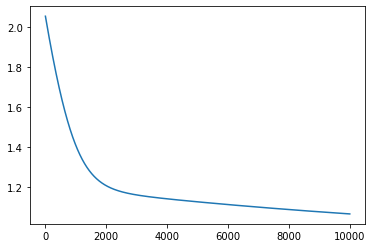

In [480]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(10000), SLR.loss_list)
plt.show()

In [481]:
SLR.theta

array([ 0.90762796, -0.14647522, -0.02026799])

【問題7】決定領域の可視化

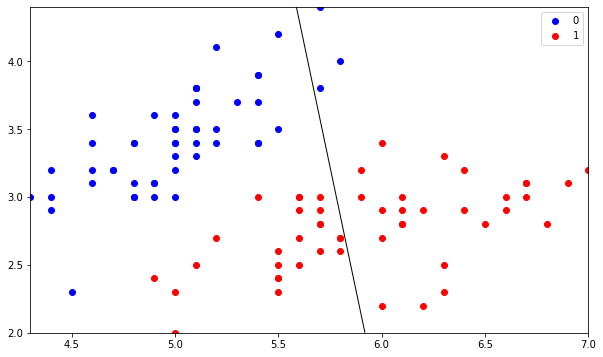

In [482]:
plt.figure(figsize=(10, 6))
plt.scatter(iris_data[iris_target == 0][:, 0], iris_data[iris_target == 0][:, 1], color='b', label='0')
plt.scatter(iris_data[iris_target == 1][:, 0], iris_data[iris_target == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = iris_data[:,0].min(), iris_data[:,0].max(),
x2_min, x2_max = iris_data[:,1].min(), iris_data[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = SLR.predict_proba(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');

【問題8】（アドバンス課題）重みの保存

In [449]:
import pickle

# テキストモードで保存
with open('weight.pickle', 'wb') as f:
    pickle.dump(SLR.theta, f)

In [450]:
# ファイル読み込み
with open('weight.pickle', 'rb') as f:
    data = pickle.load(f)
    
print(data)

[ 0.77542712 -0.39985177 -0.03542637  0.36568192  0.70374077]


In [451]:
# np.saveで保存
np.save('np_save', SLR.theta)

In [452]:
# np.loadで読み込み
print(np.load('np_save.npy'))
print(type(np.load('np_save.npy')))

[ 0.77542712 -0.39985177 -0.03542637  0.36568192  0.70374077]
<class 'numpy.ndarray'>
